In [22]:
# STEP 1: LOAD & INSPECT DATASET
import pandas as pd
df=pd.read_csv("final_balanced_crop_dataset_4600_all_districts.csv")
print(df)

               state        district      N     P      K    pH  \
0      Uttar Pradesh       Chandauli  213.9   3.3  114.2  6.38   
1        Maharashtra            Beed  165.0  26.1  165.4  5.08   
2              Bihar         Bhojpur  191.1  28.2   46.4  5.24   
3          Rajasthan       Rajsamand  186.4  17.5   55.9  6.04   
4          Rajasthan           Churu  203.7  15.5  194.4  5.87   
...              ...             ...    ...   ...    ...   ...   
4595       Telangana       Vikarabad  167.0   1.4   40.3  6.51   
4596           Bihar      Kishanganj  159.7  23.4  228.7  5.63   
4597   Uttar Pradesh          Shamli  272.9  16.4   93.5  7.16   
4598  Andhra Pradesh         Kurnool  189.1  29.1  188.2  5.63   
4599     West Bengal  South Dinajpur  240.2  25.4  222.6  6.36   

      organic_carbon  soil_moisture     soil_type  temperature_c  \
0               0.96           30.1        Clayey           24.0   
1               0.93           16.4  Black Cotton           27.5   
2  

In [23]:
print("\n Sample Rows: \n")
print(df.head())



 Sample Rows: 

           state   district      N     P      K    pH  organic_carbon  \
0  Uttar Pradesh  Chandauli  213.9   3.3  114.2  6.38            0.96   
1    Maharashtra       Beed  165.0  26.1  165.4  5.08            0.93   
2          Bihar    Bhojpur  191.1  28.2   46.4  5.24            1.09   
3      Rajasthan  Rajsamand  186.4  17.5   55.9  6.04            0.55   
4      Rajasthan      Churu  203.7  15.5  194.4  5.87            1.03   

   soil_moisture     soil_type  temperature_c  humidity_pct  rainfall_mm  \
0           30.1        Clayey           24.0            46        217.6   
1           16.4  Black Cotton           27.5            49         37.7   
2           16.6      Laterite           30.5            61          0.0   
3           17.3         Sandy           26.9            64        239.5   
4           12.0         Sandy           29.6            48        142.9   

   wind_speed_ms  solar_radiation_wm2  evapotranspiration_mm         crop  
0          

In [24]:
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  4600 non-null   object 
 1   district               4600 non-null   object 
 2   N                      4600 non-null   float64
 3   P                      4600 non-null   float64
 4   K                      4600 non-null   float64
 5   pH                     4600 non-null   float64
 6   organic_carbon         4600 non-null   float64
 7   soil_moisture          4600 non-null   float64
 8   soil_type              4600 non-null   object 
 9   temperature_c          4600 non-null   float64
 10  humidity_pct           4600 non-null   int64  
 11  rainfall_mm            4600 non-null   float64
 12  wind_speed_ms          4600 non-null   float64
 13  solar_radiation_wm2    4600 non-null   float64
 14  evapotranspiration_mm  4600 non-null   f

In [25]:
print("\n Missing Values in each column:")
print(df.isnull().sum())


 Missing Values in each column:
state                    0
district                 0
N                        0
P                        0
K                        0
pH                       0
organic_carbon           0
soil_moisture            0
soil_type                0
temperature_c            0
humidity_pct             0
rainfall_mm              0
wind_speed_ms            0
solar_radiation_wm2      0
evapotranspiration_mm    0
crop                     0
dtype: int64


In [26]:
print("\n Shape of Dataset:")
print(df.shape)


 Shape of Dataset:
(4600, 16)


In [27]:
# STEP 2: DATA CLEANING

print("Before cleaning shape:", df.shape)

# 1. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# If missing values exist, drop them
df = df.dropna()

print("\nAfter dropping missing values:", df.shape)


Before cleaning shape: (4600, 16)

Missing values:
state                    0
district                 0
N                        0
P                        0
K                        0
pH                       0
organic_carbon           0
soil_moisture            0
soil_type                0
temperature_c            0
humidity_pct             0
rainfall_mm              0
wind_speed_ms            0
solar_radiation_wm2      0
evapotranspiration_mm    0
crop                     0
dtype: int64

After dropping missing values: (4600, 16)


In [28]:
# 2. Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nDuplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()

print("\nAfter removing duplicates:", df.shape)




Duplicate rows: 0

After removing duplicates: (4600, 16)


In [30]:
# -----------------------------------------
# STEP 3: ENCODING + SCALING + TRAIN-TEST SPLIT
# -----------------------------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df=pd.read_csv("final_balanced_crop_dataset_4600_all_districts.csv")

#Label Encoding for 'soil_type'
label_encoder=LabelEncoder()
df["crop_label"]=label_encoder.fit_transform(df["crop"])

print("crop label mapping:")
for crop,label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{crop}:{label}")


crop label mapping:
Bajra:0
Banana:1
Bengal Gram:2
Coconut:3
Cotton:4
Groundnut:5
Maize:6
Mirchi:7
Moong:8
Mustard:9
Onion:10
Potato:11
Ragi:12
Rice:13
Sorghum:14
Soybean:15
Sugarcane:16
Sunflower:17
Tobacco:18
Tomato:19
Toor:20
Urad:21
Wheat:22


In [31]:
# --------------------
# 2️⃣ Select categorical INPUT features for One-Hot Encoding
# --------------------

categorical_features=["soil_type","state","district"]
#creating one-hot encoder
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
#fitting and transforming the categorical features
encoded_ohe=ohe.fit_transform(df[categorical_features])
#get new column names after one-hot encoding
ohe_columns=ohe.get_feature_names_out(categorical_features)
#creating encoded DF
df_ohe=pd.DataFrame(encoded_ohe,columns=ohe_columns)
print(df_ohe)



      soil_type_Black Cotton  soil_type_Clayey  soil_type_Laterite  \
0                        0.0               1.0                 0.0   
1                        1.0               0.0                 0.0   
2                        0.0               0.0                 1.0   
3                        0.0               0.0                 0.0   
4                        0.0               0.0                 0.0   
...                      ...               ...                 ...   
4595                     0.0               0.0                 0.0   
4596                     0.0               0.0                 0.0   
4597                     0.0               0.0                 0.0   
4598                     1.0               0.0                 0.0   
4599                     0.0               1.0                 0.0   

      soil_type_Loamy  soil_type_Red Soil  soil_type_Sandy  soil_type_Silty  \
0                 0.0                 0.0              0.0              0.0   
1

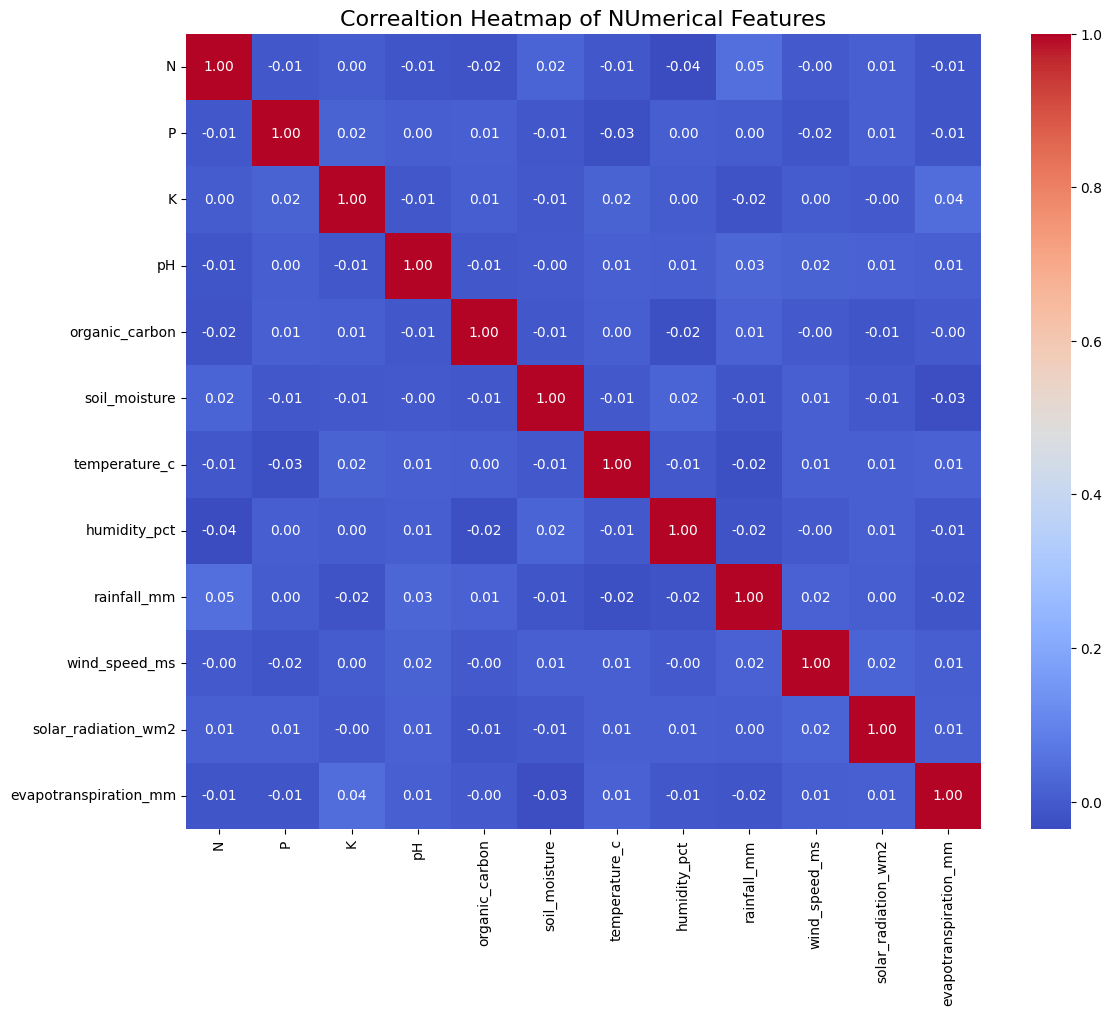

In [33]:
# -----------------------------------------
# CORRELATION MATRIX (SEABORN VERSION)
# -----------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [
    "N", "P", "K", "pH", "organic_carbon", "soil_moisture",
    "temperature_c", "humidity_pct", "rainfall_mm",
    "wind_speed_ms", "solar_radiation_wm2", "evapotranspiration_mm"
]

corr=df[numerical_features].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cmap="coolwarm",square=True,fmt=".2f")
plt.title("Correaltion Heatmap of NUmerical Features", fontsize=16)
plt.tight_layout()
plt.show()



In [36]:
df['crop'].value_counts()

crop
Onion          200
Tobacco        200
Soybean        200
Rice           200
Bengal Gram    200
Sugarcane      200
Banana         200
Tomato         200
Toor           200
Moong          200
Sunflower      200
Bajra          200
Wheat          200
Ragi           200
Maize          200
Urad           200
Groundnut      200
Coconut        200
Cotton         200
Mirchi         200
Mustard        200
Sorghum        200
Potato         200
Name: count, dtype: int64

In [39]:
unique_crops=df['crop'].unique()
print("Unique crops in dataset:")
print(unique_crops)
num_crops=len(unique_crops)
print("\n Number of unique crops: ", num_crops)

Unique crops in dataset:
['Onion' 'Tobacco' 'Soybean' 'Rice' 'Bengal Gram' 'Sugarcane' 'Banana'
 'Tomato' 'Toor' 'Moong' 'Sunflower' 'Bajra' 'Wheat' 'Ragi' 'Maize' 'Urad'
 'Groundnut' 'Coconut' 'Cotton' 'Mirchi' 'Mustard' 'Sorghum' 'Potato']

 Number of unique crops:  23


C:\Users\HP\AppData\Local\Temp\ipykernel_1908\1457326482.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['N'])


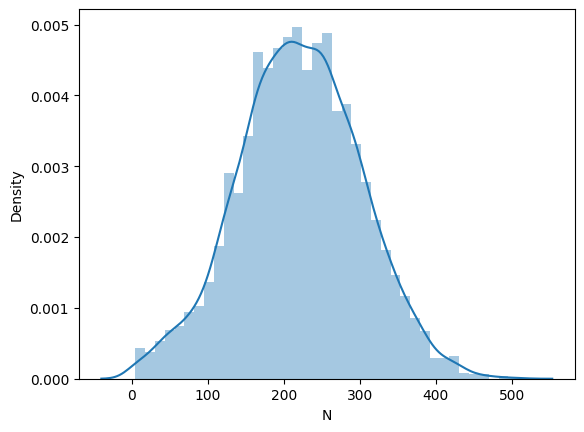

In [44]:
import matplotlib.pyplot as plt
sns.distplot(df['N'])
plt.show()

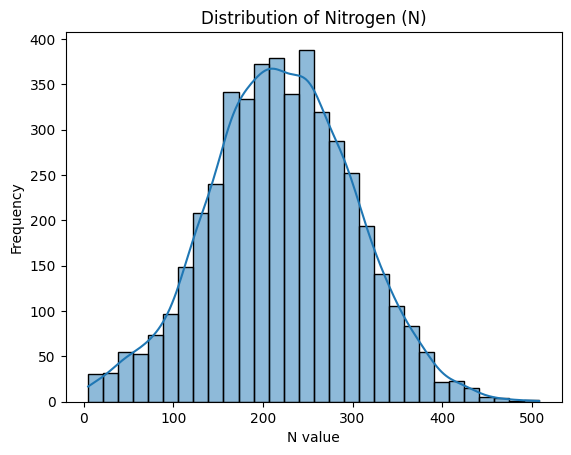

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['N'], kde=True, bins=30)
plt.title("Distribution of Nitrogen (N)")
plt.xlabel("N value")
plt.ylabel("Frequency")
plt.show()


In [48]:
# --------------------
# SCALE NUMERICAL FEATURES
# --------------------

from sklearn.preprocessing import StandardScaler

numerical_features = [
    "N", "P", "K", "pH", "organic_carbon", "soil_moisture",
    "temperature_c", "humidity_pct", "rainfall_mm",
    "wind_speed_ms", "solar_radiation_wm2", "evapotranspiration_mm"
]

df_num = df[numerical_features]

scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=numerical_features)

print("Numerical features scaled successfully!")


Numerical features scaled successfully!


In [49]:
from sklearn.model_selection import train_test_split

# X = all input features (already encoded and scaled)
# y = crop_label (encoded target)
# Combine all processed features → X
X = pd.concat([df_num_scaled, df_ohe], axis=1)

# Target label → y
y = df["crop_label"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,       # 20% test data
    random_state=42,      # same split every time
    stratify=y            # keeps labels balanced
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


X shape: (4600, 359)
y shape: (4600,)
Training data shape: (3680, 359)
Testing data shape: (920, 359)
Training labels shape: (3680,)
Testing labels shape: (920,)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.035869565217391305


In [53]:
# Preprocessing + train/test + model comparison (fit transformers on TRAIN only)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import time

# 1) Load and clean (do NOT re-read elsewhere)
df = pd.read_csv("final_balanced_crop_dataset_4600_all_districts.csv")
df = df.dropna().drop_duplicates().reset_index(drop=True)

# 2) Feature lists (use the same columns as your notebook)
numerical_features = ["N","P","K","pH","organic_carbon","soil_moisture",
                      "temperature_c","humidity_pct","rainfall_mm",
                      "wind_speed_ms","solar_radiation_wm2","evapotranspiration_mm"]
categorical_features = ["soil_type","state","district"]

# 3) Target encoding (label target)
le = LabelEncoder()
y = le.fit_transform(df["crop"])

# 4) Create X (raw values, untransformed)
X = df[numerical_features + categorical_features]

# 5) Split BEFORE fitting scalers/encoders
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 6) ColumnTransformer: NUM -> StandardScaler, CAT -> OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop",
    sparse_threshold=0
)

# 7) Fit transformer on TRAIN only, transform both
X_train_trans = ct.fit_transform(X_train)
X_test_trans  = ct.transform(X_test)

# 8) Models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(probability=False, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
}

# 9) Train + evaluate
results = []
for name, model in models.items():
    print(f"\n--- {name} ---")
    start = time.time()
    try:
        model.fit(X_train_trans, y_train)
        y_pred = model.predict(X_test_trans)
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print("Classification report:")
        print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
        print("Confusion matrix:")
        print(confusion_matrix(y_test, y_pred))
        results.append((name, acc, time.time() - start))
    except Exception as e:
        print("ERROR:", e)
        results.append((name, None, None))

print("\nSummary (sorted by accuracy):")
for name, acc, runtime in sorted([r for r in results if r[1] is not None], key=lambda x: x[1], reverse=True):
    print(f"{name:20s}  Accuracy: {acc:.4f}   Time(s): {runtime:.1f}")


--- Logistic Regression ---
Accuracy: 0.0435
Classification report:
              precision    recall  f1-score   support

       Bajra       0.00      0.00      0.00        40
      Banana       0.05      0.05      0.05        40
 Bengal Gram       0.06      0.07      0.07        40
     Coconut       0.09      0.07      0.08        40
      Cotton       0.03      0.03      0.03        40
   Groundnut       0.00      0.00      0.00        40
       Maize       0.00      0.00      0.00        40
      Mirchi       0.09      0.10      0.09        40
       Moong       0.07      0.07      0.07        40
     Mustard       0.03      0.03      0.03        40
       Onion       0.03      0.03      0.03        40
      Potato       0.00      0.00      0.00        40
        Ragi       0.05      0.05      0.05        40
        Rice       0.10      0.15      0.12        40
     Sorghum       0.03      0.03      0.03        40
     Soybean       0.04      0.05      0.05        40
   Sugarcane